In [456]:
import pandas as pd
import numpy as np
df = pd.read_csv('sgemm_product.csv')

In [526]:
df2 = df.assign(RunMean = (df['Run1 (ms)'] + df['Run2 (ms)']  + df['Run3 (ms)']  + df['Run4 (ms)'] )/4)

In [527]:
df2 = df2.drop(columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

In [459]:
X = df2.iloc[:,:14]

In [460]:
y = df2['RunMean']
y_mean = y.mean()
y_sd = y.std()
y = (y-y_mean)/y_sd

In [461]:
Xnp = X.to_numpy()
from sklearn.preprocessing import StandardScaler
X.iloc[:,:10] = StandardScaler().fit_transform(X.iloc[:,:10])

In [462]:
ynp

array([ 0.1184787 , -0.22804996, -0.20735257, ..., -0.94207388,
       -1.12963911, -1.54438644])

In [469]:
np.median(ynp)

-0.40076444381591425

In [466]:
Xnp = X.as_matrix()
ynp = y.as_matrix()

C:\Users\saitj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\saitj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.4, random_state=42)

In [470]:
print(np.sum(y > -0.40076444381591425))
len(y)

120799


241600

In [437]:
print(y.median())

-0.33457430788570725


In [471]:
sigmoid(-0.40076444381591425)

0.4011286879101227

In [473]:
y_train_class = []
for i in y_train:
    if i > -0.40076444381591425:
        x = 1
        y_train_class.append(x)
    else:
        x = 0
        y_train_class.append(x)

y_test_class = []
for i in y_test:
    if i > -0.40076444381591425:
        x = 1
        y_test_class.append(x)
    else:
        x = 0
        y_test_class.append(x)

In [474]:
n_samples, n_features = X_train.shape

In [475]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [476]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
LOG_LRtrain = {}
LOG_LRcost = {}

LOG_LRtest = {}
db = {}
for lr in [0.3,0.1,1]:   
    weights = np.zeros(n_features)
    #bias = 0
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    LOG_LRcost['LRcost_%s' % lr] = []
    for iteration in range(0,500):
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)
        #y_trainS = sigmoid(y_train)

        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-np.asarray(y_train_class)))
        #db = (1/n_samples)*np.sum(y_train_pred-np.asarray(y_train_class))

        weights = weights - lr*dw
        #bias = bias - lr*db
        
        lin_y_train = np.dot(X_train, weights) 
        y_train_pred = sigmoid(lin_y_train)
        y_train_pred_class = []
        for i in y_train_pred:
            if i > 0.4011286879101227:
                x=1
                y_train_pred_class.append(x)
            else:
                x=0
                y_train_pred_class.append(0)
        
        accuracy_train = (np.asarray(y_train_pred_class) == np.asarray(y_train_class)).sum() / len(y_train_class)
        
        lin_y_test = np.dot(X_test, weights) 
        y_test_pred = sigmoid(lin_y_test)
        y_test_pred_class = []
        for i in y_test_pred:
            if i > 0.4011286879101227:
                x=1
                y_test_pred_class.append(x)
            else:
                x=0
                y_test_pred_class.append(0)
        
        accuracy_test = (np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum() / len(y_test_class)
        class1_cost = -np.asarray(y_test_class)*np.log((y_test_pred))
        class2_cost = (1-np.asarray(y_test_class))*np.log(1-y_test_pred)
        cost = (class1_cost - class2_cost).sum() / len(y_test_class)
        LOG_LRcost['LRcost_%s' % lr].append(cost)
        
        
        
        #accuracy_train = sum(i > 0.4011286879101227 for i in y_train_pred) / len(y_train_pred)
        #print(i)
        
        #print(len(y_train_pred_class))
        #print(len(y_train_class))
        
        #correct_train = (y_train_class == y_train_pred_class)
        #accuracy_train = correct_train.sum() / correct_train.size
        
        #MSE_train = np.mean((y_pred-y_train)**2)
        #MSE_test = np.mean((y_pred_final-y_test)**2)
        #LOG_LRtrain['LRtrain_%s' % lr].append(accuracy_train)
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
    print(accuracy_test)
    print(accuracy_train)

0.7949089403973509
0.7935706401766004
0.793801738410596
0.7921288631346578
0.7948985927152318
0.7936189293598234


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,np.asarray(y_train_class))
#model.score(X_train,np.asarray(y_train_class))
model.score(X_test,np.asarray(y_test_class))

0.8113100165562914

In [450]:
(np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum()/len(y_test_pred_class)

0.7236961920529801

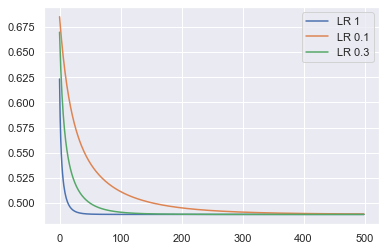

In [477]:
iterations = []
for i in range (0,len(LOG_LRcost['LRcost_1'])):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
#ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_1'],legend='brief', label='LR 1')
#ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_3'],legend='brief', label='LR 3')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.3'],legend='brief', label='LR 0.3')

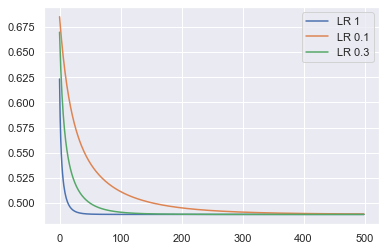

In [480]:
iterations = []
for i in range (0,len(LOG_LRcost['LRcost_1'])):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
#ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_1'],legend='brief', label='LR 1')
#ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_3'],legend='brief', label='LR 3')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.3'],legend='brief', label='LR 0.3')

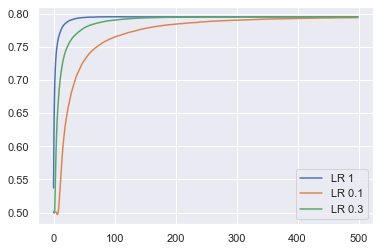

In [478]:
iterations = []
for i in range (0,len(LOG_LRtest['LRtest_1'])):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
#ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_3'],legend='brief', label='LR 3')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.3'],legend='brief', label='LR 0.3')

In [169]:
LOG_LRcost['LRcost_1.5']

[array([5.24101295e-06, 3.85944555e-06, 4.92002129e-06, ...,
        4.04677816e-06, 4.86012927e-06, 9.64283813e-06]),
 array([4.60394937e-06, 2.89817608e-06, 3.82620768e-06, ...,
        2.92670506e-06, 3.88738393e-06, 1.07679081e-05]),
 array([4.41910548e-06, 2.55657113e-06, 3.15451028e-06, ...,
        2.37343901e-06, 3.32959934e-06, 1.12611864e-05]),
 array([4.42077375e-06, 2.43548529e-06, 2.69268920e-06, ...,
        2.04350100e-06, 2.95482924e-06, 1.14481539e-05]),
 array([4.50824189e-06, 2.40970441e-06, 2.35448508e-06, ...,
        1.82292892e-06, 2.68125605e-06, 1.14797763e-05]),
 array([4.63569260e-06, 2.42849184e-06, 2.09632031e-06, ...,
        1.66368348e-06, 2.47130326e-06, 1.14326246e-05]),
 array([4.77988939e-06, 2.46764482e-06, 1.89324016e-06, ...,
        1.54217012e-06, 2.30464203e-06, 1.13475901e-05]),
 array([4.92842449e-06, 2.51448716e-06, 1.72976049e-06, ...,
        1.44553644e-06, 2.16906506e-06, 1.12469903e-05]),
 array([5.07461823e-06, 2.56210921e-06, 1.595711

In [146]:
y_test_pred_class

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


In [143]:
y_test_pred

array([1.00000000e+000, 1.00000000e+000, 2.22136348e-094, ...,
       1.94975576e-100, 7.22703149e-071, 1.00000000e+000])

In [145]:
y_test_pred_class = []
for i in y_test_pred:
    if i > 0.4011286879101227:
        x=1
        y_test_pred_class.append(x)
    else:
        x=0
        y_test_pred_class.append(x)

In [148]:
(np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum()/len(y_test_class)

0.6247620033112583

In [105]:
db

0.0006407785826289062

In [ ]:
y_train_class = []
for i in y_train:
    if i > -0.40076444381591425:
        x = 1
        y_train_class.append(x)
    else:
        x = 0
        y_train_class.append(x)

y_test_class = []
for i in y_test:
    if i > -0.40076444381591425:
        x = 1
        y_test_class.append(x)
    else:
        x = 0
        y_test_class.append(x)

In [17]:
y_test_pred_class

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [30]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    

In [40]:
y_train_pred_class

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [39]:
np.sum(y_train_pred_class != y_train_class)

1

In [41]:
y_train_class

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [358]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
LOG_LRtrain = {}
LOG_LRcost = {}
LOG_LRtrain_cost = {}
LOG_LRtest = {}
db = {}
for conv in [0.00001]:
    lr=1
    weights = np.zeros(n_features)
    #bias = 0
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    LOG_LRcost['LRcost_%s' % lr] = []
    LOG_LRtrain_cost['LRtrain_cost_%s' % lr] = []
    dw_l = []
    for iteration in range(0,100):
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)

        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-np.asarray(y_train_class)))
        #db = (1/n_samples)*np.sum(y_train_pred-np.asarray(y_train_class))
        dw_l.append(dw.sum())
        #for iteration>10:
            #if dw_l[iteration]-dw_l[iteration-1] < conv:
                #break

        weights = weights - lr*dw
        
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)
        y_train_pred_class = []
        for i in y_train_pred:
            if i > 0.4011286879101227:
                x=1
                y_train_pred_class.append(x)
            else:
                x=0
                y_train_pred_class.append(0)
        
        accuracy_train = (np.asarray(y_train_pred_class) == np.asarray(y_train_class)).sum() / len(y_train_class)
        class1_cost = -np.asarray(y_train_class)*np.log((y_train_pred))
        class2_cost = (1-np.asarray(y_train_class))*np.log(1-y_train_pred)
        cost_train= (class1_cost - class2_cost).sum() / len(y_train_class)
        LOG_LRtrain_cost['LRtrain_cost_%s' % lr].append(cost_train)
        
        lin_y_test = np.dot(X_test, weights)
        y_test_pred = sigmoid(lin_y_test)
        y_test_pred_class = []
        for i in y_test_pred:
            if i > 0.4011286879101227:
                x=1
                y_test_pred_class.append(x)
            else:
                x=0
                y_test_pred_class.append(0)
        
        accuracy_test = (np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum() / len(y_test_class)
        class1_cost = -np.asarray(y_test_class)*np.log((y_test_pred))
        class2_cost = (1-np.asarray(y_test_class))*np.log(1-y_test_pred)
        cost= (class1_cost - class2_cost).sum() / len(y_test_class)
        LOG_LRcost['LRcost_%s' % lr].append(cost)
        
            
        #if diff_cost < 0.000001
        
        #accuracy_train = sum(i > 0.4011286879101227 for i in y_train_pred) / len(y_train_pred)
        #print(cost)
        #print(cost_train)
        
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
    print(accuracy_test)
    print(accuracy_train)

0.7950124172185431
0.7935499448123621


In [353]:
len(dw_l)

1

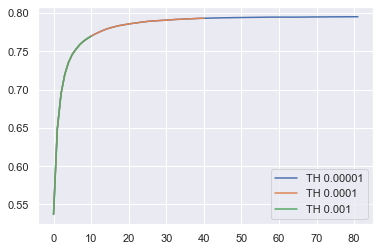

In [376]:
iterations = []
for i in range (0,len(dw_l)):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
#ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
ax = sns.lineplot(x=iterations[:82], y=LOG_LRtest['LRtest_1'][:82],legend='brief', label='TH 0.00001')
ax = sns.lineplot(x=iterations[:41], y=LOG_LRtest['LRtest_1'][:41],legend='brief', label='TH 0.0001')
ax = sns.lineplot(x=iterations[:11], y=LOG_LRtest['LRtest_1'][:11],legend='brief', label='TH 0.001')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.3'],legend='brief', label='LR 0.3')

In [355]:
dw_l

[-0.18209416073198945]

In [363]:
w = (-np.diff(dw_l)[10:] > 0.00001)
w = list(w)
w.index(False)

81

In [372]:
LOG_LRtest['LRtest_1'][10]

0.7696502483443709

In [354]:
dw_l[1]-dw_l[0] 

IndexError: list index out of range

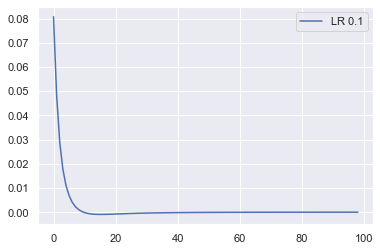

In [289]:
iterations = []
for i in range (0,len(dw_l)-1):
    iterations.append(i)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_100'],legend='brief', label='LR 100')
#ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_1'],legend='brief', label='LR 1')
#ax = sns.lineplot(x=iterations[:188], y=LOG_LRcost['LRcost_1'][:188],legend='brief', label='LR 1')
#ax = sns.lineplot(x=iterations[:399], y=LOG_LRcost['LRcost_1'][:399],legend='brief', label='LR 3')
ax = sns.lineplot(x=iterations, y=np.diff(dw_l),legend='brief', label='LR 0.1')
#ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.3'],legend='brief', label='LR 0.3')

In [319]:
np.diff(dw_l) 

array([ 8.07378836e-02,  4.80252845e-02,  2.88582690e-02,  1.77732368e-02,
        1.10731975e-02,  6.85628959e-03,  4.12549552e-03,  2.32594092e-03,
        1.13045968e-03,  3.36694229e-04, -1.85320130e-04, -5.21498640e-04,
       -7.29881809e-04, -8.50307404e-04, -9.10427977e-04, -9.29580502e-04,
       -9.21343101e-04, -8.95261631e-04, -8.58036113e-04, -8.14347199e-04,
       -7.67437995e-04, -7.19526955e-04, -6.72102624e-04, -6.26134932e-04,
       -5.82227046e-04, -5.40724648e-04, -5.01794573e-04, -4.65481309e-04,
       -4.31747493e-04, -4.00502792e-04, -3.71624371e-04, -3.44971274e-04,
       -3.20394395e-04, -2.97743267e-04, -2.76870575e-04, -2.57635038e-04,
       -2.39903137e-04, -2.23550032e-04, -2.08459923e-04, -1.94526037e-04,
       -1.81650357e-04, -1.69743208e-04, -1.58722742e-04, -1.48514389e-04,
       -1.39050284e-04, -1.30268714e-04, -1.22113578e-04, -1.14533878e-04,
       -1.07483248e-04, -1.00919515e-04, -9.48042979e-05, -8.91026457e-05,
       -8.37827017e-05, -

In [195]:
cost

0.4908554979582179

In [327]:
dw_l

[-0.18209416073198945,
 -0.10135627716155649,
 -0.053330992626629534,
 -0.024472723615518957,
 -0.0066994868309886366,
 0.004373710637141348,
 0.011230000223538083,
 0.015355495745749851,
 0.017681436662081138,
 0.018811896343744795,
 0.01914859057298078,
 0.018963270443051274,
 0.01844177180305222,
 0.01771188999421928,
 0.016861582590281154,
 0.015951154613632685,
 0.015021574112050186,
 0.014100231010889483,
 0.013204969379852164,
 0.012346933267122976,
 0.011532586068269297,
 0.01076514807277008,
 0.010045621117998926,
 0.00937351849397016,
 0.008747383561668626,
 0.008165156515510441,
 0.007624431867139642,
 0.007122637294550918,
 0.0066571559856431345,
 0.00622540849219739,
 0.005824905700231656,
 0.005453281329348782,
 0.005108310054895595,
 0.004787915659656718,
 0.004490172392790138,
 0.004213301817949809,
 0.003955666779788509,
 0.003715763642812713,
 0.003492213611211848,
 0.003283753687977081,
 0.0030892276509251054,
 0.0029075772934414375,
 0.0027378340852041707,
 0.002579

In [326]:
w = (-np.diff(dw_l)[10:] > 0.00001)
w = list(w)
w.index(False)

81

In [274]:
w = (-np.diff(dw_l) > 0.0001)
w

array([], dtype=bool)

In [239]:
a = (-np.diff(LOG_LRcost['LRcost_1']) > 0.00000001)
a = list(a)
a.index(False)

398

In [240]:
a = (-np.diff(LOG_LRcost['LRcost_1']) > 0.0000001)
a = list(a)
a.index(False)

279

In [241]:
a = (-np.diff(LOG_LRcost['LRcost_1']) > 0.000001)
a = list(a)
a.index(False)

186

In [242]:
a = (-np.diff(LOG_LRcost['LRcost_1']) > 0.00001)
a = list(a)
a.index(False)

112

In [243]:
a = (-np.diff(LOG_LRcost['LRcost_1']) > 0.0001)
a = list(a)
a.index(False)

51

In [259]:
b = (np.diff(LOG_LRtest['LRtest_1']) > 0.00001)
b = list(b)
b.index(False)

37

In [262]:
LOG_LRtest['LRtest_1']

[0.5374586092715232,
 0.6454470198675497,
 0.6880380794701987,
 0.7104718543046358,
 0.7246585264900662,
 0.7344060430463576,
 0.7413182947019867,
 0.746171357615894,
 0.7500310430463576,
 0.753580298013245,
 0.7566639072847682,
 0.7584850993377483,
 0.7603787251655629,
 0.7622102649006622,
 0.7640831953642384,
 0.7655422185430464,
 0.766835678807947,
 0.7681912251655629,
 0.7692156456953643,
 0.7701572847682119,
 0.7710885761589404,
 0.7720095198675496,
 0.7725372516556291,
 0.773334023178808,
 0.7739134933774835,
 0.7744101821192053,
 0.7746792218543046,
 0.7749689569536424,
 0.7752483443708609,
 0.7756415562913908,
 0.7759726821192053,
 0.7761278973509934,
 0.7763348509933775,
 0.7763865894039735,
 0.776459023178808,
 0.7765418046357616,
 0.7765521523178808,
 0.7767073675496688,
 0.7766763245033113,
 0.7768211920529802,
 0.7769350165562914,
 0.7769557119205298,
 0.776966059602649,
 0.7771730132450331,
 0.7773075331125828,
 0.7773385761589404,
 0.7774006622516556,
 0.7774317052980132

In [261]:
LOG_LRcost['LRcost_1']

[0.6232063632940956,
 0.5854360538417513,
 0.5624622245763268,
 0.5470439748697418,
 0.535934860631042,
 0.52751714981435,
 0.5209044291007364,
 0.5155707469801806,
 0.5111826886611713,
 0.507516993764887,
 0.5044172727068983,
 0.5017698743187146,
 0.49948970716933694,
 0.49751150930575855,
 0.49578424163766,
 0.49426734921555115,
 0.49292818360998586,
 0.49174017325690494,
 0.4906814916226706,
 0.4897340666354114,
 0.48888283031751306,
 0.48811514146436474,
 0.48742033554605924,
 0.48678936980158605,
 0.4862145406475215,
 0.48568925674479224,
 0.4852078553911975,
 0.48476545297375845,
 0.48435782242906056,
 0.4839812922843017,
 0.48363266306075814,
 0.48330913773245615,
 0.48300826362700067,
 0.48272788368959807,
 0.4824660954457993,
 0.48222121632267295,
 0.4819917542434395,
 0.481776382612965,
 0.481573918972849,
 0.4813833067341419,
 0.4812035994998866,
 0.48103394757396245,
 0.4808735863212158,
 0.4807218260997737,
 0.4805780435322455,
 0.4804416739201922,
 0.4803122046373351,
 0.

In [328]:
dw_l[10]

0.01914859057298078

In [551]:
import random
test_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
random_num = random.choice(test_list)
print(random_num)

TypeError: choice() got an unexpected keyword argument 'seed'

In [550]:
variables = []
for i in range(10):
    random_num = random.choice(test_list)
    variables.append(random_num)
    test_list.remove(random_num)
print(variables)

[9, 11, 2, 5, 12, 4, 8, 13, 1, 10]


In [489]:
variables
X

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,0,0
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,0,1
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,1,0
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,1,1
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,0,1,1
241596,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,1,0,0
241597,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,1,0,1
241598,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,1,1,0


In [492]:
X_8f = X[['NWG','KWG','MDIMA','NDIMB','KWI','STRM','STRN','SB']]

In [494]:
y_mean = y.mean()
y_sd = y.std()
y = (y-y_mean)/y_sd

In [500]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_8f, y, test_size=0.4, random_state=42)

In [496]:
y_train_class = []
for i in y_train:
    if i > -0.40076444381591425:
        x = 1
        y_train_class.append(x)
    else:
        x = 0
        y_train_class.append(x)

y_test_class = []
for i in y_test:
    if i > -0.40076444381591425:
        x = 1
        y_test_class.append(x)
    else:
        x = 0
        y_test_class.append(x)

In [502]:
n_samples, n_features = X_train.shape

In [504]:
LOG_LRtrain = {}
LOG_LRcost = {}

LOG_LRtest = {}
db = {}
for lr in [0.3,0.1,1,3]:   
    weights = np.zeros(n_features)
    #bias = 0
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    LOG_LRcost['LRcost_%s' % lr] = []
    for iteration in range(0,500):
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)
        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-np.asarray(y_train_class)))

        weights = weights - lr*dw
        
        lin_y_train = np.dot(X_train, weights) 
        y_train_pred = sigmoid(lin_y_train)
        y_train_pred_class = []
        for i in y_train_pred:
            if i > 0.40112868791012124:
                x=1
                y_train_pred_class.append(x)
            else:
                x=0
                y_train_pred_class.append(x)
        
        accuracy_train = (np.asarray(y_train_pred_class) == np.asarray(y_train_class)).sum() / len(y_train_class)
        
        lin_y_test = np.dot(X_test, weights) 
        y_test_pred = sigmoid(lin_y_test)
        y_test_pred_class = []
        for i in y_test_pred:
            if i > 0.40112868791012124:
                x=1
                y_test_pred_class.append(x)
            else:
                x=0
                y_test_pred_class.append(x)
        
        accuracy_test = (np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum() / len(y_test_class)
        class1_cost = -np.asarray(y_test_class)*np.log((y_test_pred))
        class2_cost = (1-np.asarray(y_test_class))*np.log(1-y_test_pred)
        cost = (class1_cost - class2_cost).sum() / len(y_test_class)
        
        LOG_LRcost['LRcost_%s' % lr].append(cost)
   
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
    print(accuracy_test)
    print(accuracy_train)

0.5838783112582782
0.5838507174392936
0.5830194536423841
0.5831815673289183
0.5838783112582782
0.5838507174392936
0.5838783112582782
0.5838507174392936


In [498]:
y.median()
sigmoid(-0.4007644438159202)

0.40112868791012124

In [512]:
df2.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,RunMean
MWG,1.000000e+00,5.999256e-04,9.295914e-03,1.057905e-01,-8.590185e-03,1.587719e-01,1.489790e-02,1.477334e-19,3.537634e-01,-8.409828e-04,6.925002e-21,1.385000e-21,0.000000,0.000000,0.351810
NWG,5.999256e-04,1.000000e+00,9.295914e-03,-8.590185e-03,1.057905e-01,1.489790e-02,1.587719e-01,8.568535e-19,-8.409828e-04,3.537634e-01,6.925002e-21,1.385000e-21,0.000000,0.000000,0.320460
KWG,9.295914e-03,9.295914e-03,1.000000e+00,1.483483e-01,1.483483e-01,-3.456333e-02,-3.456333e-02,-1.809508e-19,-1.198611e-02,-1.198611e-02,1.871905e-21,0.000000e+00,0.000000,0.000000,0.011230
MDIMC,1.057905e-01,-8.590185e-03,1.483483e-01,1.000000e+00,-2.095622e-01,1.974329e-01,8.460552e-02,-3.179926e-18,-1.339114e-01,1.053121e-02,-1.120569e-20,-3.735230e-21,0.000000,0.000000,-0.221097
NDIMC,-8.590185e-03,1.057905e-01,1.483483e-01,-2.095622e-01,1.000000e+00,8.460552e-02,1.974329e-01,-5.251734e-18,1.053121e-02,-1.339114e-01,-1.120569e-20,-3.735230e-21,0.000000,0.000000,-0.214595
MDIMA,1.587719e-01,1.489790e-02,-3.456333e-02,1.974329e-01,8.460552e-02,1.000000e+00,8.809625e-02,-4.552194e-18,-2.027124e-01,-1.903229e-02,1.566122e-21,1.566122e-21,0.000000,0.000000,-0.007035
NDIMB,1.489790e-02,1.587719e-01,-3.456333e-02,8.460552e-02,1.974329e-01,8.809625e-02,1.000000e+00,-1.083339e-17,-1.903229e-02,-2.027124e-01,1.566122e-21,1.566122e-21,0.000000,0.000000,-0.008707
KWI,1.477334e-19,8.568535e-19,-1.809508e-19,-3.179926e-18,-5.251734e-18,-4.552194e-18,-1.083339e-17,1.000000e+00,-3.613975e-16,-4.814803e-16,0.000000e+00,0.000000e+00,0.000000,0.000000,0.032571
VWM,3.537634e-01,-8.409828e-04,-1.198611e-02,-1.339114e-01,1.053121e-02,-2.027124e-01,-1.903229e-02,-3.613975e-16,1.000000e+00,1.164501e-03,-1.411219e-20,9.408125e-22,0.000000,0.000000,0.164273
VWN,-8.409828e-04,3.537634e-01,-1.198611e-02,1.053121e-02,-1.339114e-01,-1.903229e-02,-2.027124e-01,-4.814803e-16,1.164501e-03,1.000000e+00,-1.411219e-20,9.408125e-22,0.000000,0.000000,0.144745


In [511]:
df2.corr()['RunMean']

MWG        0.351810
NWG        0.320460
KWG        0.011230
MDIMC     -0.221097
NDIMC     -0.214595
MDIMA     -0.007035
NDIMB     -0.008707
KWI        0.032571
VWM        0.164273
VWN        0.144745
STRM      -0.012586
STRN      -0.000108
SA         0.051975
SB         0.063963
RunMean    1.000000
Name: RunMean, dtype: float64

In [ ]:
['MWG','NWG','MDIMC','NDIMC','VWM','VWN', 'SA','SB','KWI','STRM']

In [ ]:
sigmoid(y_mean)
print(y_mean)

In [681]:
X_10I = X[['MWG','NWG','MDIMC','NDIMC','VWM','VWN', 'SA','SB','KWI','STRM']]
X_10R = X[['MWG','NWG','MDIMC','NDIMC','KWI','VWM','VWN','STRM','STRN','SA']]

from sklearn.preprocessing import StandardScaler
X.iloc[:,:10] = StandardScaler().fit_transform(X.iloc[:,:10])
y_mean = y.mean()
y_sd = y.std()
y = (y-y_mean)/y_sd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

y_train_class = []
for i in y_train:
    if i > -0.40076444381591425:
        x = 1
        y_train_class.append(x)
    else:
        x = 0
        y_train_class.append(x)

y_test_class = []
for i in y_test:
    if i > -0.40076444381591425:
        x = 1
        y_test_class.append(x)
    else:
        x = 0
        y_test_class.append(x)
        
n_samples, n_features = X_train.shape

In [682]:
LOG_LRtrain = {}
LOG_LRcost = {}

LOG_LRtest = {}
dw_l = []
for lr in [0.5]:   
    weights = np.zeros(n_features)
    #bias = 0
    LOG_LRtrain['LRtrain_%s' % lr] = []
    LOG_LRtest['LRtest_%s' % lr] = []
    LOG_LRcost['LRcost_%s' % lr] = []
    for iteration in range(0,1000):
        lin_y_train = np.dot(X_train, weights)
        y_train_pred = sigmoid(lin_y_train)
        dw = (1/n_samples)*np.dot(X_train.T,(y_train_pred-np.asarray(y_train_class)))
        dw_l.append(dw.sum())
        weights = weights - lr*dw
        
        lin_y_train = np.dot(X_train, weights) 
        y_train_pred = sigmoid(lin_y_train)
        y_train_pred_class = []
        for i in y_train_pred:
            if i > 0.40112868791012124:
                x=1
                y_train_pred_class.append(x)
            else:
                x=0
                y_train_pred_class.append(x)
        
        accuracy_train = (np.asarray(y_train_pred_class) == np.asarray(y_train_class)).sum() / len(y_train_class)
        
        lin_y_test = np.dot(X_test, weights) 
        y_test_pred = sigmoid(lin_y_test)
        y_test_pred_class = []
        for i in y_test_pred:
            if i > 0.40112868791012124:
                x=1
                y_test_pred_class.append(x)
            else:
                x=0
                y_test_pred_class.append(x)
        
        accuracy_test = (np.asarray(y_test_pred_class) == np.asarray(y_test_class)).sum() / len(y_test_class)
        class1_cost = -np.asarray(y_test_class)*np.log((y_test_pred))
        class2_cost = (1-np.asarray(y_test_class))*np.log(1-y_test_pred)
        cost = (class1_cost - class2_cost).sum() / len(y_test_class)
        
        LOG_LRcost['LRcost_%s' % lr].append(cost)
   
        LOG_LRtest['LRtest_%s' % lr].append(accuracy_test)
        LOG_LRtrain['LRtrain_%s' % lr].append(accuracy_train)
    print(accuracy_test)
    print(accuracy_train)

0.7948985927152318
0.7936189293598234


In [638]:
iterations = []
for i in range (0,1000):
    iterations.append(i)

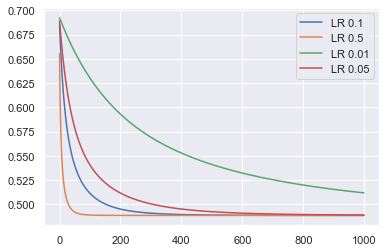

In [641]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LOG_LRcost['LRcost_0.05'],legend='brief', label='LR 0.05')
plt.show()

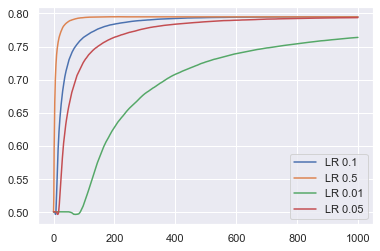

In [642]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LOG_LRtest['LRtest_0.05'],legend='brief', label='LR 0.05')
plt.show()

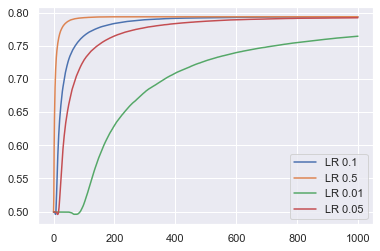

In [646]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.1'],legend='brief', label='LR 0.1')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.5'],legend='brief', label='LR 0.5')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.01'],legend='brief', label='LR 0.01')
ax = sns.lineplot(x=iterations, y=LOG_LRtrain['LRtrain_0.05'],legend='brief', label='LR 0.05')
plt.show()

In [583]:
dw_l

[-0.1820941607319853,
 -0.1412134818343671,
 -0.10853339927789407,
 -0.08264926003705078,
 -0.0621495681217237,
 -0.04585397223684245,
 -0.032839604390477596,
 -0.022401047395394065,
 -0.014000810659962459,
 -0.007227114513440927,
 -0.00176161726749491,
 0.0026443170855582074,
 0.006186874115210816,
 0.009022349569450139,
 0.011276358402449792,
 0.013050654423142233,
 0.014428237403644267,
 0.015477221968204197,
 0.01625380184404086,
 0.0168045458081608,
 0.017168194336254113,
 0.01737707906260851,
 0.017458254222999178,
 0.017434405901676785,
 0.01732458818363323,
 0.017144823219640604,
 0.016908593375464118,
 0.01662724711624882,
 0.01631033541859211,
 0.01596589184831824,
 0.015600666667864775,
 0.015220323212699808,
 0.014829603135271745,
 0.01443246583719822,
 0.01403220640751702,
 0.013631555591825887,
 0.013232764685604193,
 0.01283767773867529,
 0.012447793049214395,
 0.01206431559407867,
 0.011688201771528243,
 0.011320197610283918,
 0.01096087141570435,
 0.010610641672169446,

In [650]:
w = abs(np.diff(dw_l)) < 0.0001
w = list(w)
w.index(True)
#LOG_LRtest['LRtest_0.5'][21]

21

In [684]:
w = abs(np.diff(dw_l)) < 0.00001
w = list(w)
w.index(True)
LOG_LRtrain['LRtrain_0.5'][157]

0.7933222958057395

In [653]:
w = abs(np.diff(dw_l)) < 0.000001
w = list(w)
w.index(True)
#LOG_LRtest['LRtest_0.5'][249]

249

In [689]:
CT_dot000001 = []
for i in range (0,1000):
    if i < 249:
        CT_dot000001.append(LOG_LRtest['LRtest_0.5'][i])
    else:
        CT_dot000001.append(LOG_LRtest['LRtest_0.5'][249])

len(CT_dot000001)

1000

In [688]:
CT_dot00001 = []
for i in range (0,1000):
    if i < 157:
        CT_dot00001.append(LOG_LRtest['LRtest_0.5'][i])
    else:
        CT_dot00001.append(LOG_LRtest['LRtest_0.5'][157])



len(CT_dot00001)

1000

In [687]:
CT_dot0001 = []
for i in range (0,1000):
    if i < 21:
        CT_dot0001.append(LOG_LRtest['LRtest_0.5'][i])
    else:
        CT_dot0001.append(LOG_LRtest['LRtest_0.5'][21])
len(CT_dot0001)

1000

In [663]:
LOG_LRtrain['LRtrain_0.5'][249]

0.7935361479028697

In [670]:
CT_dot000001_train = []
for i in range (0,1000):
    if i < 249:
        CT_dot000001_train.append(LOG_LRtrain['LRtrain_0.5'][i])
    else:
        CT_dot000001_train.append(LOG_LRtrain['LRtrain_0.5'][249])

len(CT_dot000001_train)

1000

In [671]:
CT_dot00001_train = []
for i in range (0,1000):
    if i < 157:
        CT_dot00001_train.append(LOG_LRtest['LRtest_0.5'][i])
    else:
        CT_dot00001_train.append(LOG_LRtest['LRtest_0.5'][157])

len(CT_dot00001_train)

1000

In [672]:
CT_dot0001_train = []
for i in range (0,1000):
    if i < 21:
        CT_dot0001_train.append(LOG_LRtrain['LRtrain_0.5'][i])
    else:
        CT_dot0001_train.append(LOG_LRtrain['LRtrain_0.5'][21])

len(CT_dot0001_train)

1000

In [673]:
iterations = []
for i in range (0,1000):
    iterations.append(i)

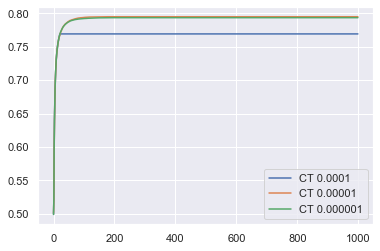

In [685]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=CT_dot0001_train,legend='brief', label='CT 0.0001')
ax = sns.lineplot(x=iterations, y=CT_dot00001_train,legend='brief', label='CT 0.00001')
ax = sns.lineplot(x=iterations, y=CT_dot000001_train,legend='brief', label='CT 0.000001')
plt.show()

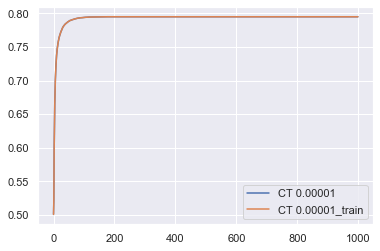

In [691]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=CT_dot00001,legend='brief', label='CT 0.00001')
ax = sns.lineplot(x=iterations, y=CT_dot00001_train,legend='brief', label='CT 0.00001_train')
plt.show()

In [657]:
    
iterations = []
for i in range (0,1000):
    iterations.append(i)

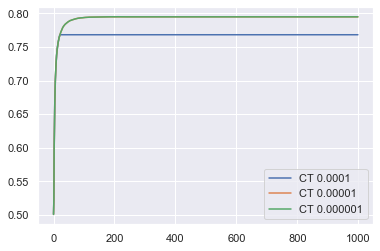

In [690]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x=iterations, y=CT_dot0001,legend='brief', label='CT 0.0001')
ax = sns.lineplot(x=iterations, y=CT_dot00001,legend='brief', label='CT 0.00001')
ax = sns.lineplot(x=iterations, y=CT_dot000001,legend='brief', label='CT 0.000001')
plt.show()

In [616]:
len(CT_dot000001)

1843

In [530]:
df2.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,RunMean
MWG,1.000000e+00,5.999256e-04,9.295914e-03,1.057905e-01,-8.590185e-03,1.587719e-01,1.489790e-02,1.477334e-19,3.537634e-01,-8.409828e-04,6.925002e-21,1.385000e-21,0.000000,0.000000,0.351810
NWG,5.999256e-04,1.000000e+00,9.295914e-03,-8.590185e-03,1.057905e-01,1.489790e-02,1.587719e-01,8.568535e-19,-8.409828e-04,3.537634e-01,6.925002e-21,1.385000e-21,0.000000,0.000000,0.320460
KWG,9.295914e-03,9.295914e-03,1.000000e+00,1.483483e-01,1.483483e-01,-3.456333e-02,-3.456333e-02,-1.809508e-19,-1.198611e-02,-1.198611e-02,1.871905e-21,0.000000e+00,0.000000,0.000000,0.011230
MDIMC,1.057905e-01,-8.590185e-03,1.483483e-01,1.000000e+00,-2.095622e-01,1.974329e-01,8.460552e-02,-3.179926e-18,-1.339114e-01,1.053121e-02,-1.120569e-20,-3.735230e-21,0.000000,0.000000,-0.221097
NDIMC,-8.590185e-03,1.057905e-01,1.483483e-01,-2.095622e-01,1.000000e+00,8.460552e-02,1.974329e-01,-5.251734e-18,1.053121e-02,-1.339114e-01,-1.120569e-20,-3.735230e-21,0.000000,0.000000,-0.214595
MDIMA,1.587719e-01,1.489790e-02,-3.456333e-02,1.974329e-01,8.460552e-02,1.000000e+00,8.809625e-02,-4.552194e-18,-2.027124e-01,-1.903229e-02,1.566122e-21,1.566122e-21,0.000000,0.000000,-0.007035
NDIMB,1.489790e-02,1.587719e-01,-3.456333e-02,8.460552e-02,1.974329e-01,8.809625e-02,1.000000e+00,-1.083339e-17,-1.903229e-02,-2.027124e-01,1.566122e-21,1.566122e-21,0.000000,0.000000,-0.008707
KWI,1.477334e-19,8.568535e-19,-1.809508e-19,-3.179926e-18,-5.251734e-18,-4.552194e-18,-1.083339e-17,1.000000e+00,-3.613975e-16,-4.814803e-16,0.000000e+00,0.000000e+00,0.000000,0.000000,0.032571
VWM,3.537634e-01,-8.409828e-04,-1.198611e-02,-1.339114e-01,1.053121e-02,-2.027124e-01,-1.903229e-02,-3.613975e-16,1.000000e+00,1.164501e-03,-1.411219e-20,9.408125e-22,0.000000,0.000000,0.164273
VWN,-8.409828e-04,3.537634e-01,-1.198611e-02,1.053121e-02,-1.339114e-01,-1.903229e-02,-2.027124e-01,-4.814803e-16,1.164501e-03,1.000000e+00,-1.411219e-20,9.408125e-22,0.000000,0.000000,0.144745


In [525]:
df2

array([[-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        , -0.27444642],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
         1.        , -0.37658896],
       [-1.51675724, -1.51675724, -1.2109972 , ...,  1.        ,
        -1.        , -0.37154489],
       ...,
       [ 1.12045227,  1.12045227,  0.82576574, ..., -1.        ,
         1.        , -0.49467729],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
        -1.        , -0.51286715],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        , -0.54170788]])

In [572]:
len(np.diff(dw_l[10:]))

489

In [574]:
np.diff(dw_l[10:]) > 0.000001

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [580]:
X

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,0,0
1,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,0,1
2,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,1,0
3,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,0,1,1
4,-1.516757,-1.516757,-1.210997,-0.753894,-0.753894,-0.998054,-0.998054,-1.0,-0.741449,-0.741449,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,0,1,1
241596,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,1,0,0
241597,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,1,0,1
241598,1.120452,1.120452,0.825766,2.294249,2.294249,1.558020,1.558020,1.0,0.794056,0.794056,1,1,1,0
